In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as  sns
import numpy as nb
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import matplotlib.dates as mdates

df_ibovespa = pd.read_csv("Historico_4_Anos_Ibovespa.csv", sep = ",", decimal = ",")



df_ibovespa['Vol.'] = df_ibovespa['Vol.'].str[:-1]
df_ibovespa['Var%'] = df_ibovespa['Var%'].str[:-1]

df_ibovespa['Vol.'] = df_ibovespa['Vol.'].str.replace(',','.')
df_ibovespa['Var%'] = df_ibovespa['Var%'].str.replace(',','.')

df_ibovespa['Vol.'] = df_ibovespa['Vol.'].astype(float)
df_ibovespa['Var%'] = df_ibovespa['Var%'].astype(float)
 
df_ibovespa["Data"] = pd.to_datetime(df_ibovespa["Data"], format="%d.%m.%Y")
df_ibovespa["Último"] = df_ibovespa["Último"].str.replace(".", "").astype(float)
df_ibovespa["Abertura"] = df_ibovespa["Abertura"].str.replace(".", "").astype(float)
df_ibovespa["Máxima"] = df_ibovespa["Máxima"].str.replace(".", "").astype(float)
df_ibovespa["Mínima"] = df_ibovespa["Mínima"].str.replace(".", "").astype(float) 



df_ibovespa = df_ibovespa.sort_values('Data')



Volume


In [106]:
print(f'Volume máximo (milhões R$): {df_ibovespa["Vol."].max()}')
print(df_ibovespa.loc[df_ibovespa["Vol."] == df_ibovespa["Vol."].max()]['Data'])

print('\n')

print(f'Volume mínimo (milhões R$): {df_ibovespa["Vol."].min()}')
print(df_ibovespa.loc[df_ibovespa["Vol."] == df_ibovespa["Vol."].min()]['Data'])

print('\n')

print(f'Volume médio (milhões R$): {df_ibovespa["Vol."].mean()}')
print(df_ibovespa.loc[df_ibovespa["Vol."] == df_ibovespa["Vol."].mean()]['Data'])


Volume máximo (milhões R$): 26.03
656   2022-11-10
Name: Data, dtype: datetime64[ns]


Volume mínimo (milhões R$): 4.33
273   2024-05-27
Name: Data, dtype: datetime64[ns]


Volume médio (milhões R$): 11.339278074866309
Series([], Name: Data, dtype: datetime64[ns])


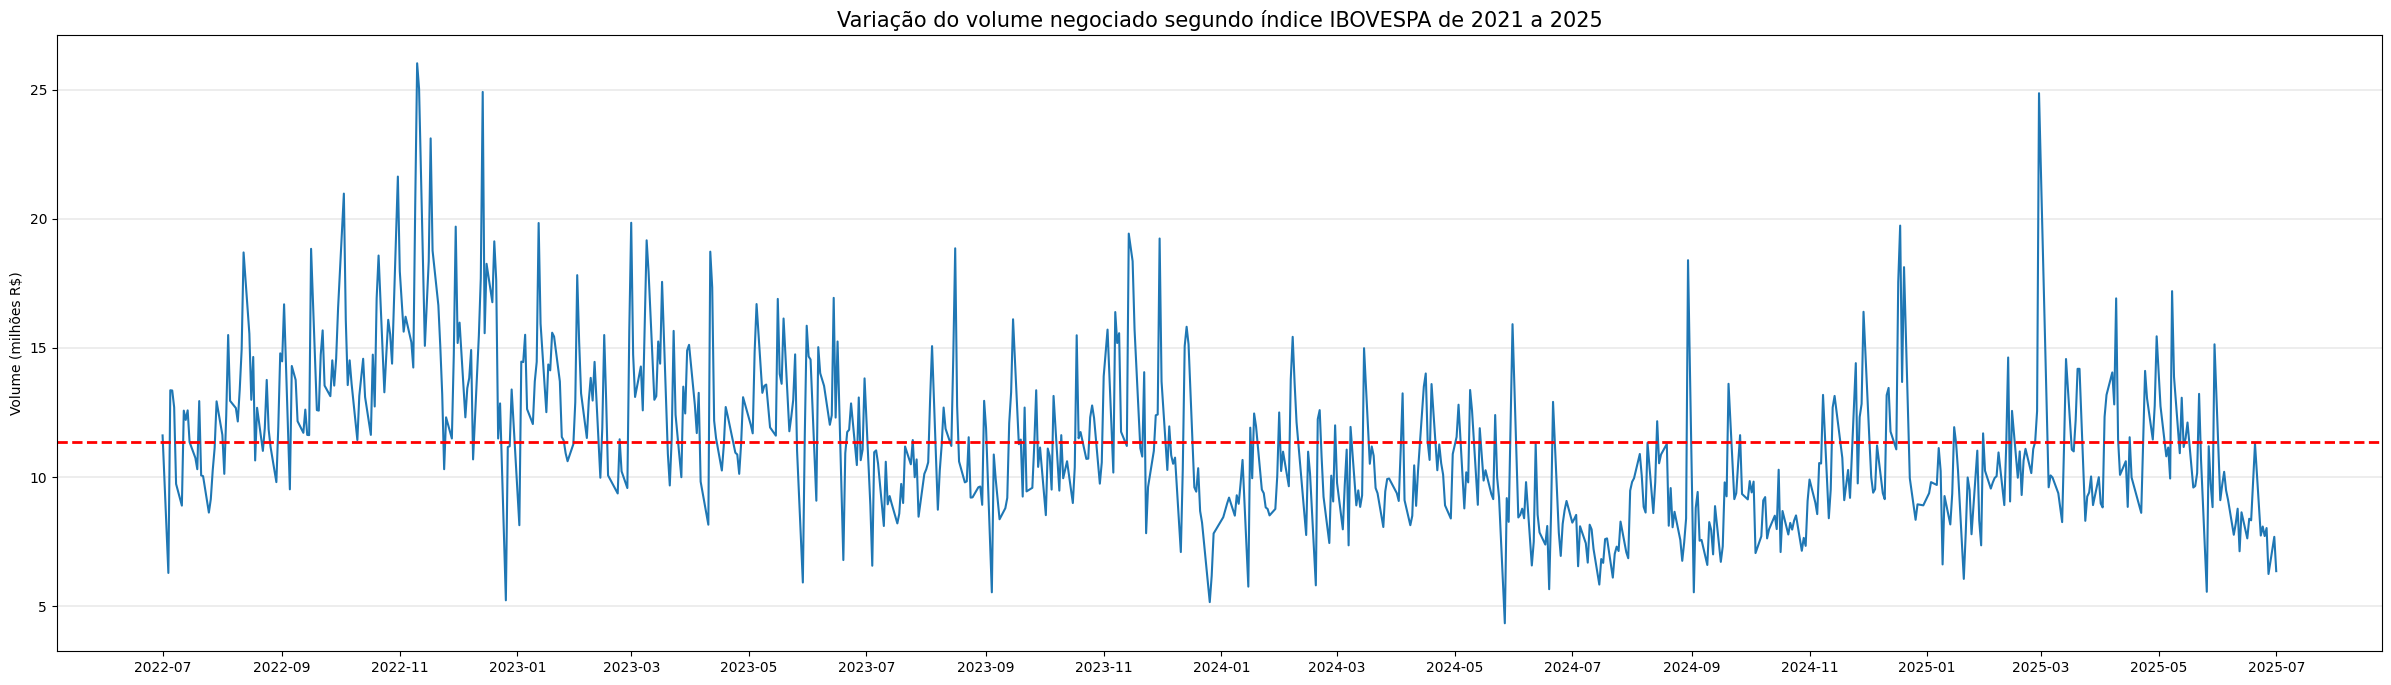

In [ ]:
fig, ax = plt.subplots(figsize=(30,8))

sns.lineplot(df_ibovespa, x='Data', y='Vol.', ax=ax)

ax.grid(True, color='black', linewidth=0.1, axis='y')
# Linha da média
plt.axhline(y=df_ibovespa["Vol."].mean(), color='red', linestyle='--', linewidth=2, label=f'Média = {df_ibovespa["Vol."].mean():.2f}')
# Eixo X com datas de 2 em 2 meses
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Mostra a cada 2 meses
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  

ax.set_title('Variação do volume negociado segundo índice IBOVESPA de 2021 a 2025', fontsize=15)
ax.set_xlabel('')
ax.set_ylabel('Volume (milhões R$)')

plt.show()

O gráfico ilustra a evolução do mercado variável no Brasil. É visível que, Outubro de 2022 as Dezembro de 2022, o volume de negociações sofreu um grande impacto positivo, sendo um dos picos mais elevados.                                                                                                           
Mas no geral de 2022 ao final de 2023 ele se manteve a maior parde do tempo a cima da media

Variação

In [108]:
print(f'Variação máxima (%): {df_ibovespa["Var%"].max()}')
print(df_ibovespa.loc[df_ibovespa["Var%"] == df_ibovespa["Var%"].max()]['Data'])

print('\n')

print(f'Variação mínima (%): {df_ibovespa["Var%"].min()}')
print(df_ibovespa.loc[df_ibovespa["Var%"] == df_ibovespa["Var%"].min()]['Data'])

print('\n')

print(f'Variação media (%): {df_ibovespa["Var%"].mean()}')
print(df_ibovespa.loc[df_ibovespa["Var%"] == df_ibovespa["Var%"].mean()]['Data'])

Variação máxima (%): 5.54
682   2022-10-03
Name: Data, dtype: datetime64[ns]


Variação mínima (%): -3.35
656   2022-11-10
Name: Data, dtype: datetime64[ns]


Variação media (%): 0.05215240641711231
Series([], Name: Data, dtype: datetime64[ns])


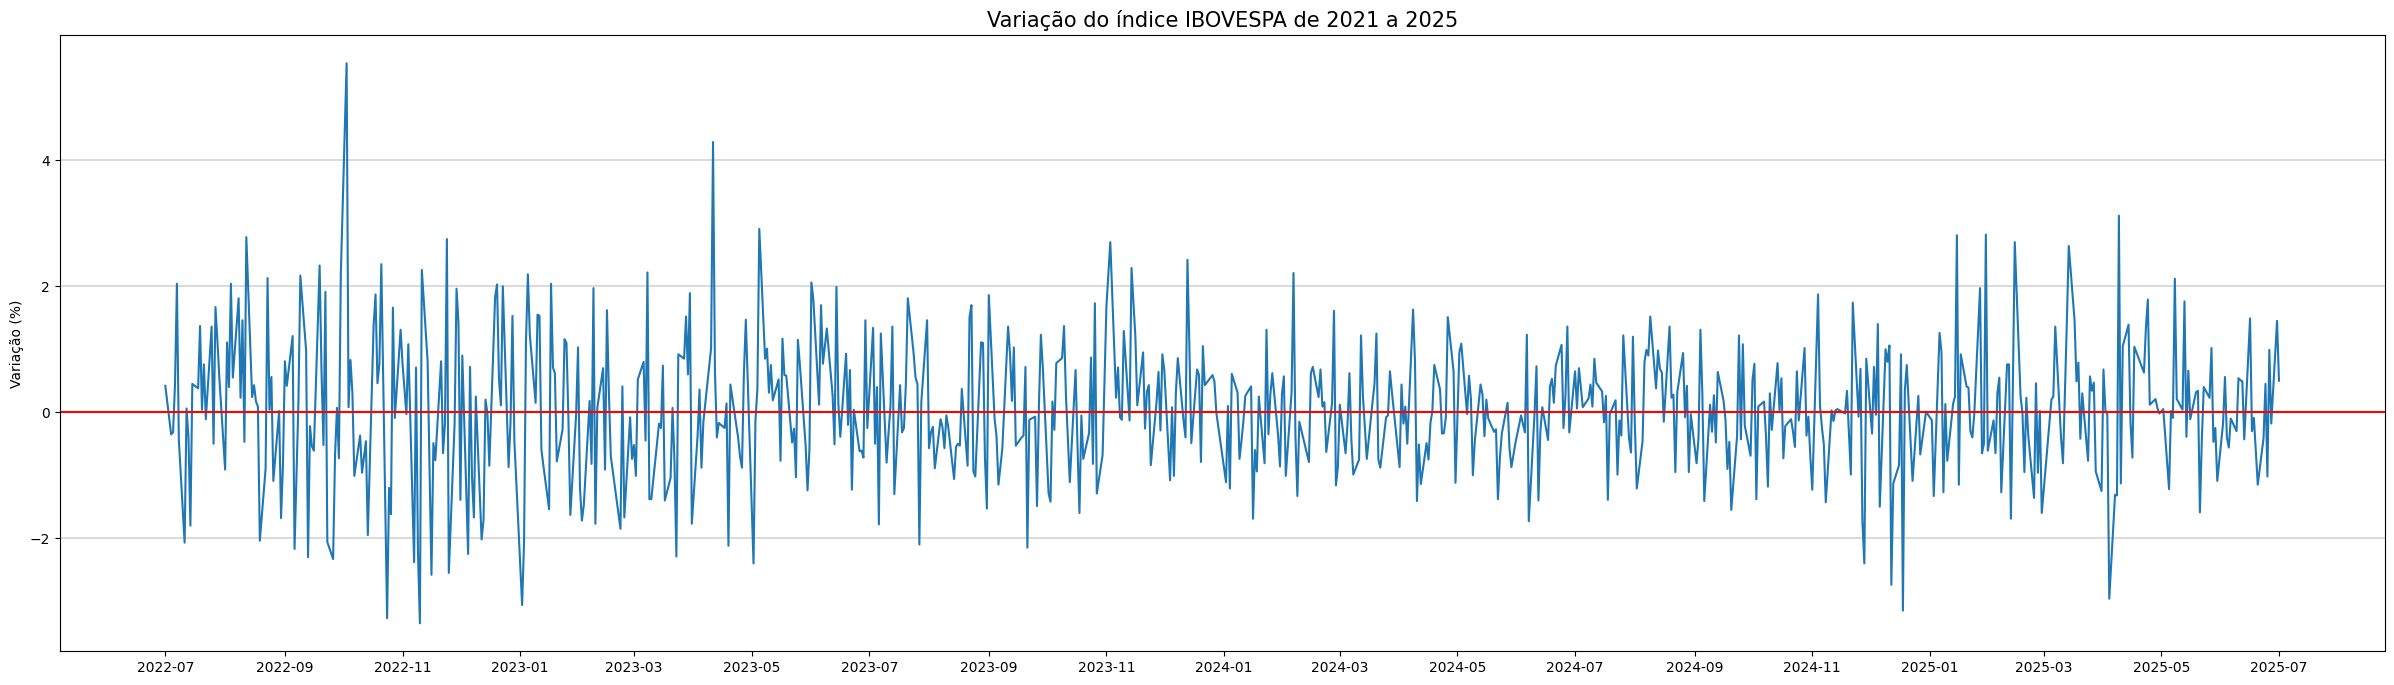

In [109]:
fig, ax = plt.subplots(figsize=(30,8))

sns.lineplot(df_ibovespa, x='Data', y='Var%', ax=ax)
ax.axhline(y=0, color='red')

ax.grid(True, color='black', linewidth=0.2, axis='y')
# Eixo X com datas de 2 em 2 meses
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Mostra a cada 2 meses
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Formato ano-mês

ax.set_title('Variação do índice IBOVESPA de 2021 a 2025', fontsize=15)
ax.set_xlabel('')
ax.set_ylabel('Variação (%)')

plt.show()

Percebe-se um gráfico com muitos altos e baixos, porém com a maioria dos valores entre -2% e +2% de variação.

Ocorrem alguns pontos no gráfico em que a variação ultrapassa esses valores, com destaque Outubro para o ano de 2022 que apresentou o comportamento mais incostante na série.